# 03: Identifying Power Outages Using Social Media - Exploratory Data Analysis
### Danielle Medellin, Matthew Malone, Omar Smiley

## Import Libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load Data

In [4]:
tweets = pd.read_csv('../data/cleaned_tweets.csv')

In [6]:
tweets.shape

(16913, 13)

In [7]:
tweets.dtypes

tweet_id              int64
username             object
text                 object
tweet_date           object
search_term          object
city                 object
lat                 float64
long                float64
radius               object
query_start          object
name_and_tweet       object
outage_sentiment    float64
state                object
dtype: object

In [8]:
tweets['tweet_date'] = pd.to_datetime(tweets['tweet_date'])

## Exploratory Data Analysis

In [12]:
tweets['outage_sentiment'].describe()

count    16913.000000
mean         0.124359
std          0.096824
min          0.000000
25%          0.060000
50%          0.100000
75%          0.170000
max          1.000000
Name: outage_sentiment, dtype: float64

The minimum outage sentiment is 0 while the max is 1. The mean is .124, showing that there is a low average outage sentiment. The 75th percentile is below .2 showing that the overwhelming majority of the tweets have low proportions of words that are associationed with power outages.  

### Looking at tweets with extreme outage sentiment

In [14]:
tweets[tweets['outage_sentiment']==1]['text']

5315                                          power outage
13649                                    this power outage
14876    storm update cps reports there are currently  ...
Name: text, dtype: object

The first two tweets in this list obviously have high association with power outages because that is literally all the tweet says. It makes sense for these tweets to have an outage sentiment value of 1. 

In [18]:
tweets.loc[14876,['text']][0]

'storm update cps reports there are currently  power outages affecting  customers in the san antonio area'

Looking at the final tweet with an outage sentiment of 1, we see a tweet that is explicitly describing a power outage in a specific area due to a storm. It, again, makes sense that this tweet would have an outage sentiment of 1 and is a great example of a tweet that would give information about a power outage. 

In [20]:
len(tweets[tweets['outage_sentiment']==0]['text'])

815

There are 815 tweets in the data set that received an outage sentiment score of 0. This means they are expected to have absoluetly no association with power outages. We will spot check a few of these tweets.

In [37]:
tweets.loc[335,['name_and_tweet']][0]

'carmen garsia here at the movies to see lightsout they werent kidding where are'

The above tweet has the phrase `lightsout` which was part of the search terms that we looked for in our intial scrape. We noticed that this pulled in many tweets about a horror movie, Lights Out, that came out in 2016. For this reason, we removed `lightsout` from our association list and, correctly, identified that tweets like the one above don't actually have any association with a power outage. 

In [38]:
tweets.loc[1738,['name_and_tweet']][0]

'pahblow i got bills theyre multiplying and im loosing controlcause the powerthey supplyingis gonna get cut off if i dont get my shit together'

The tweet above was pulled into our dataset because of its use of the word `power` and `cut` which were search terms. But after closer analysis of the tweet, we can see the tweet doesn't actually have anything to a power outage, despite the user discussing their power supply and it possibly being shut off. 

In [41]:
tweets.loc[16781,['name_and_tweet']][0]

'performance course incredible week of work for hpscotsbaseball capped off by an electric competition daycompete in preparation dominate in performanceso to our s of the week the legend drake  homerun sterling   at highland park high school'

The above tweet was pulled into our dataset for its use of the word `electric`, but obviously has nothing to do with power outages or electricity. It is valid that this tweet has an outage sentiment of 0. 

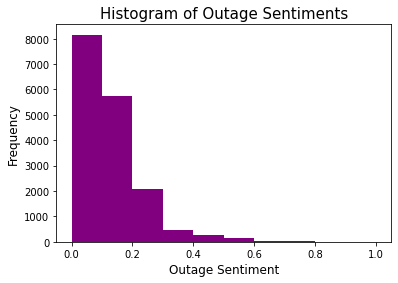

In [43]:
plt.hist(tweets['outage_sentiment'],color='purple')
plt.title('Histogram of Outage Sentiments', size = 15)
plt.xlabel('Outage Sentiment', size=12)
plt.ylabel('Frequency',size=12);

Above is the distribution of outage sentiment values for all tweets. The data is right skewed with a majority of the data falling below 0.2. As outage sentiment increases, the amount of tweets with that value decreases. Most of the tweets we found did not have strong associations to power outages. 

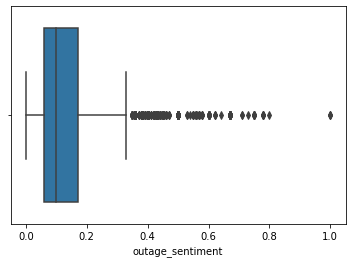

In [46]:
sns.boxplot(tweets['outage_sentiment']);

In [ ]:
word_count = []

for tweet in corpus:
    word_count.append(len(tweet))
    
np.mean(word_count)

In [ ]:
lengths = []

for tweet in tweets['text']:
    lengths.append(len(tweet))
    
np.mean(lengths)